In [159]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [160]:
ans = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
ans.head(3)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570


In [161]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.sample(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
228,229,20,RL,70.0,8521,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,125000
186,187,80,RL,NaN,9947,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,173000
1227,1228,20,RL,72.0,8872,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,147000
933,934,20,RL,63.0,8487,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,190000
241,242,30,RM,40.0,3880,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,110500


In [162]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

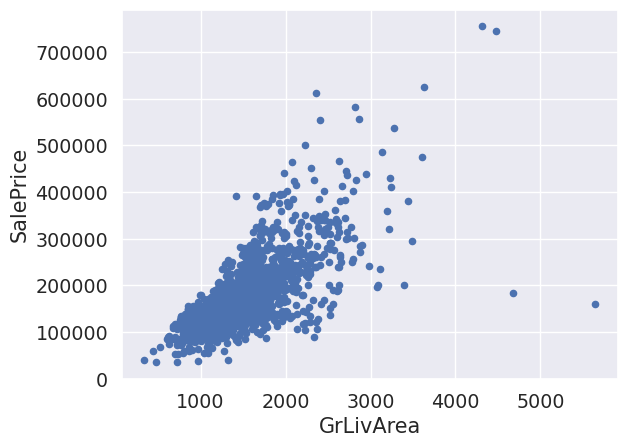

In [164]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'],df[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

In [165]:
var =  
data = pd.concat([df['SalePrice'],df[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

SyntaxError: invalid syntax (2856251381.py, line 1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'],df[var]],axis=1)
sns.boxplot(x=var,y='SalePrice',data = data)

In [ ]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'],df[var]],axis=1)
sns.boxplot(x=var,y='SalePrice',data = data)

In [ ]:
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

In [ ]:
plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(),square=True)

In [ ]:
k = 10
cols = df.corr().nlargest(k,'SalePrice')['SalePrice'].index

In [ ]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height = 2.5)
plt.show();

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total,percent],axis=1,keys = ['total','precent'] )
missing

In [ ]:
df2 = df.drop(missing[missing['total']>=1].index,axis=1)
df2

In [ ]:
df2.isnull().sum().max()

In [ ]:
from sklearn.preprocessing import StandardScaler 
saleprice_scaled = StandardScaler().fit_transform(df2['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,:].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,:].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

**well that's how you write something in notebook :) .**

In [ ]:
var = 'GrLivArea'
data = pd.concat([df2['SalePrice'],df2[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

In [ ]:
# df2[df2['GrLivArea'].argsort()][:]

In [ ]:
df3 = df2.sort_values(by='GrLivArea',ascending=False)
df3['GrLivArea']
df4 = df3.drop(1298)
df4 = df4.drop(523)

In [ ]:
var = 'GrLivArea'
data = pd.concat([df4['SalePrice'],df4[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([df4[var],df4['SalePrice']],axis=1)
data.plot.scatter(x=var,y='SalePrice')


In [ ]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df4['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df4['SalePrice'], plot=plt)

In [ ]:
df4['SalePrice'] = np.log(df4['SalePrice'])
sns.distplot(df4['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df4['SalePrice'], plot=plt)

In [ ]:
var = 'GrLivArea'
sns.distplot(df4[var],fit=norm)
fig = plt.figure()
res = stats.probplot(df4[var], plot=plt)

In [ ]:
df4['GrLivArea'] = np.log(df4['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df4['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df4['GrLivArea'], plot=plt)

In [ ]:
# create column for new variable (one is enough because it's a binary categorical feature)
# if area>0 it gets 1, for area==0 it gets 0
# df4['HasBsmt'] = pd.Series(len(df4['TotalBsmtSF']), index=df4.index)
# df4['HasBsmt'] = 0 
# df4.loc[df4['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
df4['HasBsmt'] = pd.Series(len(df4['TotalBsmtSF']),index=df4.index)
df4['HasBsmt'] = 0
df4.loc[df4['TotalBsmtSF']>0,'HasBsmt'] = 1


In [ ]:
df4['HasBsmt'].describe()

In [ ]:
df4.loc[df4['HasBsmt']==1,'TotalBsmtSF'] = np.log(df4['TotalBsmtSF'])
df4['TotalBsmtSF'].describe()

In [ ]:
sns.distplot(df4.loc[df4['HasBsmt']==1,'TotalBsmtSF'],fit=norm)

In [ ]:
df5 = df4[['YearBuilt','OverallQual','TotalBsmtSF','GrLivArea']]
df5 = pd.get_dummies(df5)
df5.head(5)